## Multiple Linear Regression Assignment - Car Price Dataset

#### Problem Statement & Business Goals

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1. Which variables are significant in predicting the price of a car.
2. How well those variables describe the price of a car.

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

In [1]:
# Importing Libraries required for Data Exploration & Machine Learning 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style='ticks', palette='viridis', font='tahoma', font_scale=1, color_codes=True, rc=None)
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset in CSV format as pandas dataframe.
cars_df = pd.read_csv("CarPrice_Assignment.csv")

Here we will follow following steps to solve this business problem.
- Reading, understanding & Visualising the data
- Preparing the dataset for modelling (train-test set, rescaling etc.)
- Training the Model
- Residual Analysis
- Predictions & Evaluation on the test set.

### Step 1: Reading & Understanding & Visualising the Data

In [3]:
# Checking first five rows of the dataframe.
cars_df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Shows the number of rows and columns in the dataset. There are total 205 rows with 26 columns.
cars_df.shape

(205, 26)

In [5]:
# Showing the column name and datatype & total no of entries for the items in each column.
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
# Showing columnwise NAN values in the dataset. This shows that there no missing data in any of the columns in the dataset.
cars_df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
# Showing statistical summary of the numerical independent variables in the dataset.
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Data Cleaning

Let's split the `CarName` column in two parts and extract only the `CarCompany` name as a separate column. Also drop the `CarName` column.

In [8]:
cars_df['CarCompany'] = cars_df['CarName'].str.split(" ", n = 1, expand = True)[0]

In [9]:
cars_df = cars_df.drop(['CarName'], axis=1)

In [10]:
cars_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [11]:
cars_df.CarCompany.unique() # Checking Unique Value in CarCompany Column to check for any discrepancies.

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Here it's clear that there are spelling mistakes in the company names which needs to be rectified. Let's do that now.

In [12]:
cars_df.loc[cars_df['CarCompany'] == 'maxda','CarCompany'] = "mazda"
cars_df.loc[cars_df['CarCompany'] == 'Nissan','CarCompany'] = "nissan"
cars_df.loc[cars_df['CarCompany'] == 'porcshce','CarCompany'] = "porsche"
cars_df.loc[cars_df['CarCompany'] == 'toyouta','CarCompany'] = "toyota"
cars_df.loc[((cars_df['CarCompany'] == 'vw') | (cars_df['CarCompany'] == 'vokswagen')),'CarCompany'] = "volkswagen"

In [13]:
cars_df.CarCompany.unique() # Now there are total 22 Car Company names all unique.

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Let's inspect all the categorical columns for spelling mistake in data provided and other discrepancies.

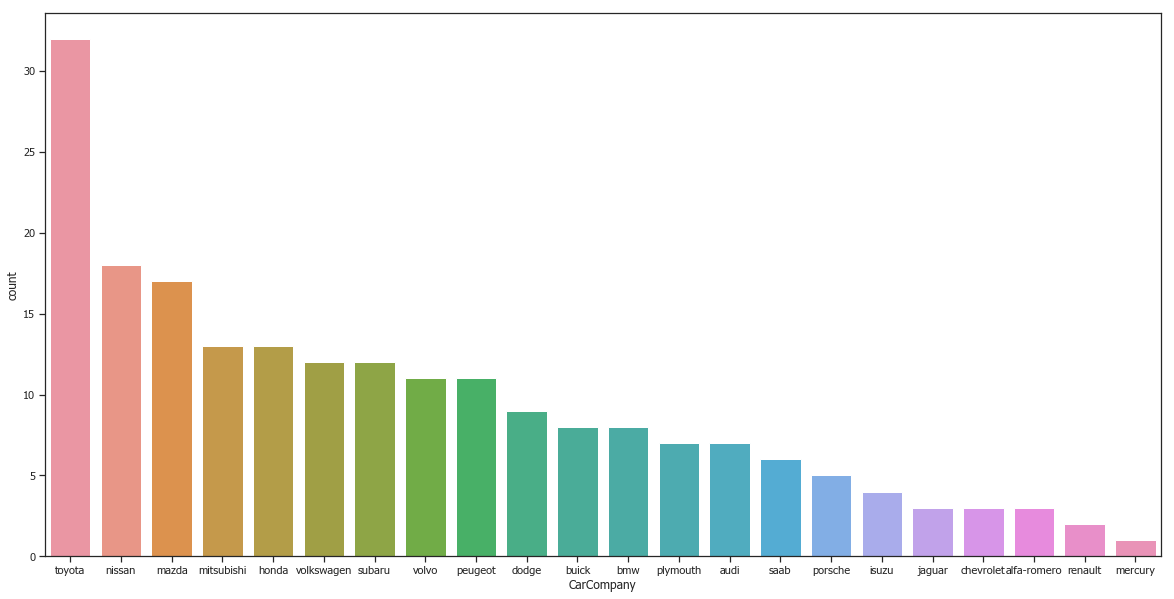

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(cars_df['CarCompany'],order=cars_df['CarCompany'].value_counts().index)

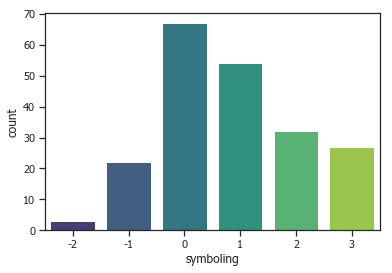

In [15]:
sns.countplot(cars_df['symboling'])

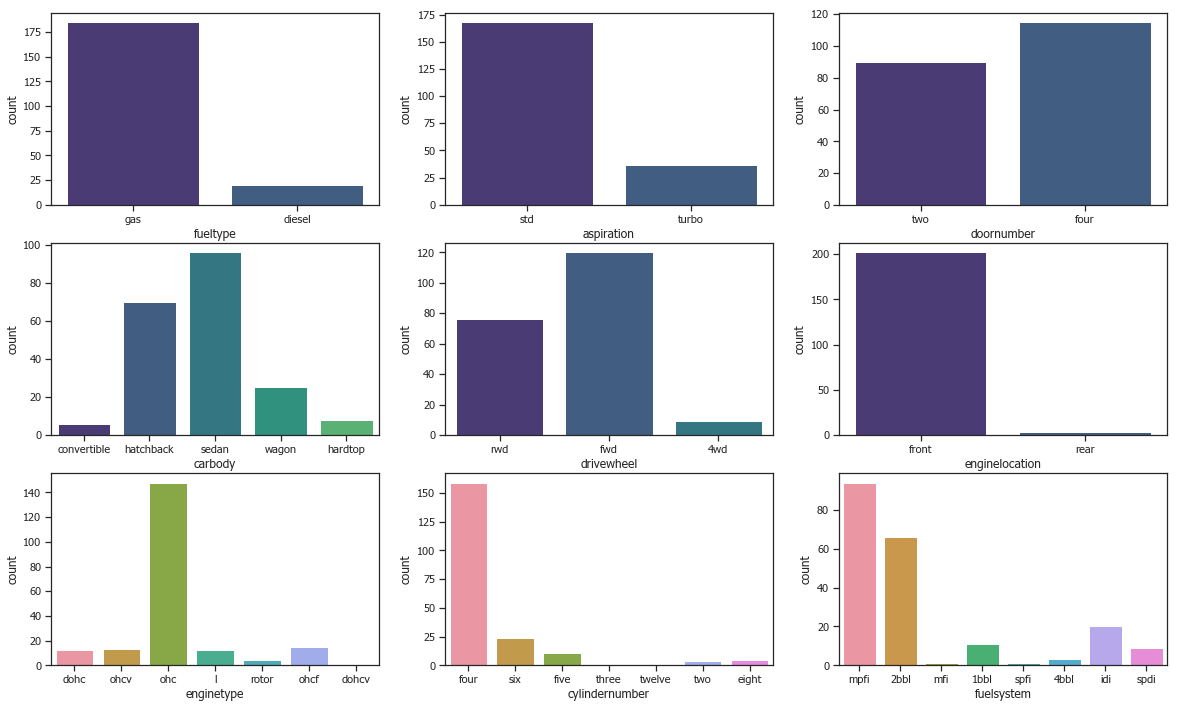

In [16]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.countplot(cars_df['fueltype'])
plt.subplot(3,3,2)
sns.countplot(cars_df['aspiration'])
plt.subplot(3,3,3)
sns.countplot(cars_df['doornumber'])
plt.subplot(3,3,4)
sns.countplot(cars_df['carbody'])
plt.subplot(3,3,5)
sns.countplot(cars_df['drivewheel'])
plt.subplot(3,3,6)
sns.countplot(cars_df['enginelocation'])
plt.subplot(3,3,7)
sns.countplot(cars_df['enginetype'])
plt.subplot(3,3,8)
sns.countplot(cars_df['cylindernumber'])
plt.subplot(3,3,9)
sns.countplot(cars_df['fuelsystem'])

In [17]:
cars_df['enginetype'].value_counts() * 100/len(cars_df['enginetype']) # Showing percentage of datapoints in each class of enginetype

ohc      72.195122
ohcf      7.317073
ohcv      6.341463
dohc      5.853659
l         5.853659
rotor     1.951220
dohcv     0.487805
Name: enginetype, dtype: float64

In [18]:
cars_df['cylindernumber'].value_counts() * 100/len(cars_df['cylindernumber'])

four      77.560976
six       11.707317
five       5.365854
eight      2.439024
two        1.951220
three      0.487805
twelve     0.487805
Name: cylindernumber, dtype: float64

In [19]:
cars_df['fuelsystem'].value_counts() * 100/len(cars_df['fuelsystem'])

mpfi    45.853659
2bbl    32.195122
idi      9.756098
1bbl     5.365854
spdi     4.390244
4bbl     1.463415
spfi     0.487805
mfi      0.487805
Name: fuelsystem, dtype: float64

Following inferences can be drawn from the above plots:
 - Toyota is the most sold brand in USA.
 - There is more sale of std aspiration type compared to turbo type.
 - Four door type cars are more common and sold more than 2 door type cars.
 - Sedan is the most preferred carbody type followed by hatchback.
 - Sale of Forward wheel drive cars are more compared to rear wheel & four wheel drive cars.
 - Most of the cars sold is having engine location in the front.
 - Similarly, ohc enginetype , 4 cylinder cars and mpfi fuel system is more in demand.
 - Majority of car sold has symboling rating of 0 or 1.
 - For `enginetype` & `cylindernumber` variable more than 70% of datapoint lies in a single catagory and this won't help in modelling. We must drop these columns.
 - Also remove car_ID column as it's not gonna add any value in building linear regression model.

In [20]:
cars_df.drop(['car_ID', 'enginetype','cylindernumber'], axis=1, inplace=True) # Removed independent variables which has least impact on model.

In [21]:
cars_df.loc[cars_df.duplicated()] # Just to check any duplicate rows in the dataset.

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany


Clearly there are no duplicate rows in the dataset.

##### Visualizing all the numerical variables in the dataset now.

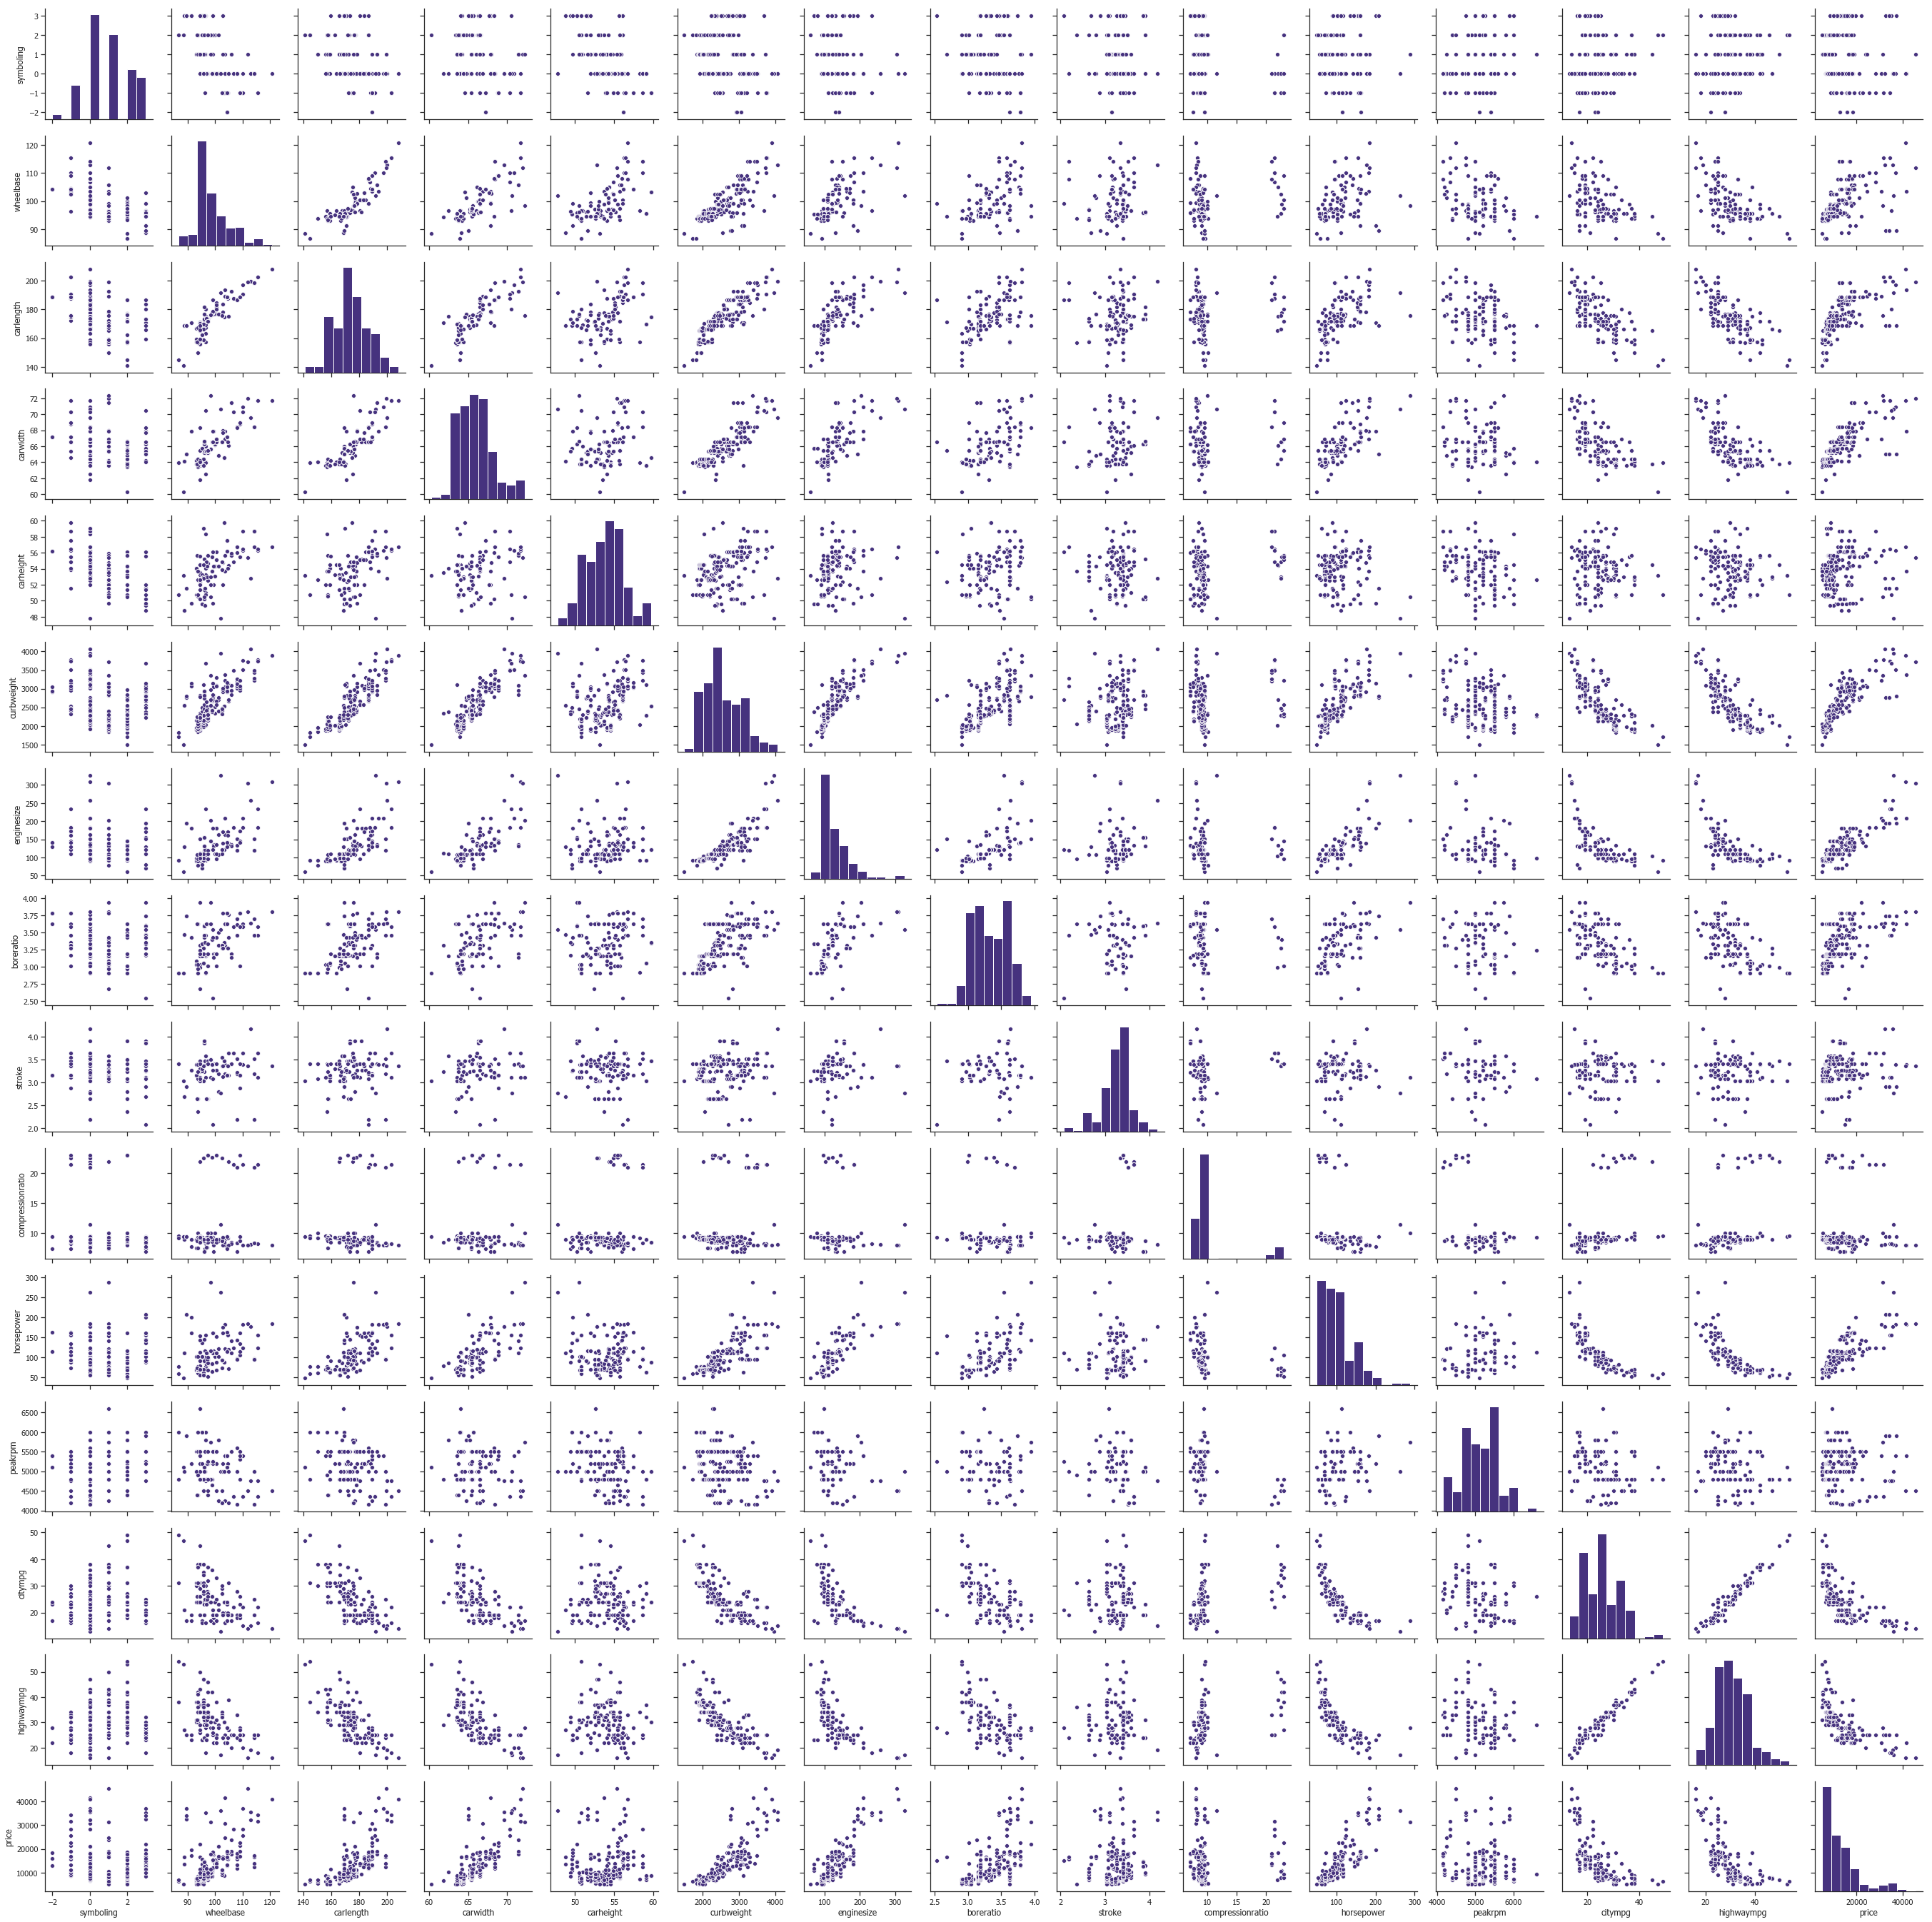

In [22]:
sns.pairplot(cars_df)

From the above scatterplot it's clearly evident that there is good correlation between price and carlength, enginesize, wheelbase, carwidth, curbweight, horsepower, citympg & highwaympg. Hence some of the variance in price can be expalined by these independent variable and hence linear regression can be a suitable model for this dataset.

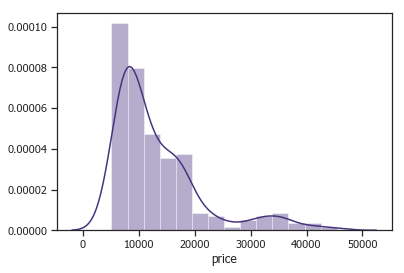

In [23]:
sns.distplot(cars_df['price']) # Also lets visualise the histogram of price separately for better understanding of spread.

The price variable has a nice and long spread from approx 5000 to 45000 with mean and median prices 13.2K & 10.2K approximately.

Let's also visualize  categorical independent variables using Boxplots. Please note that here we have assumed symboling as a categorical variable.

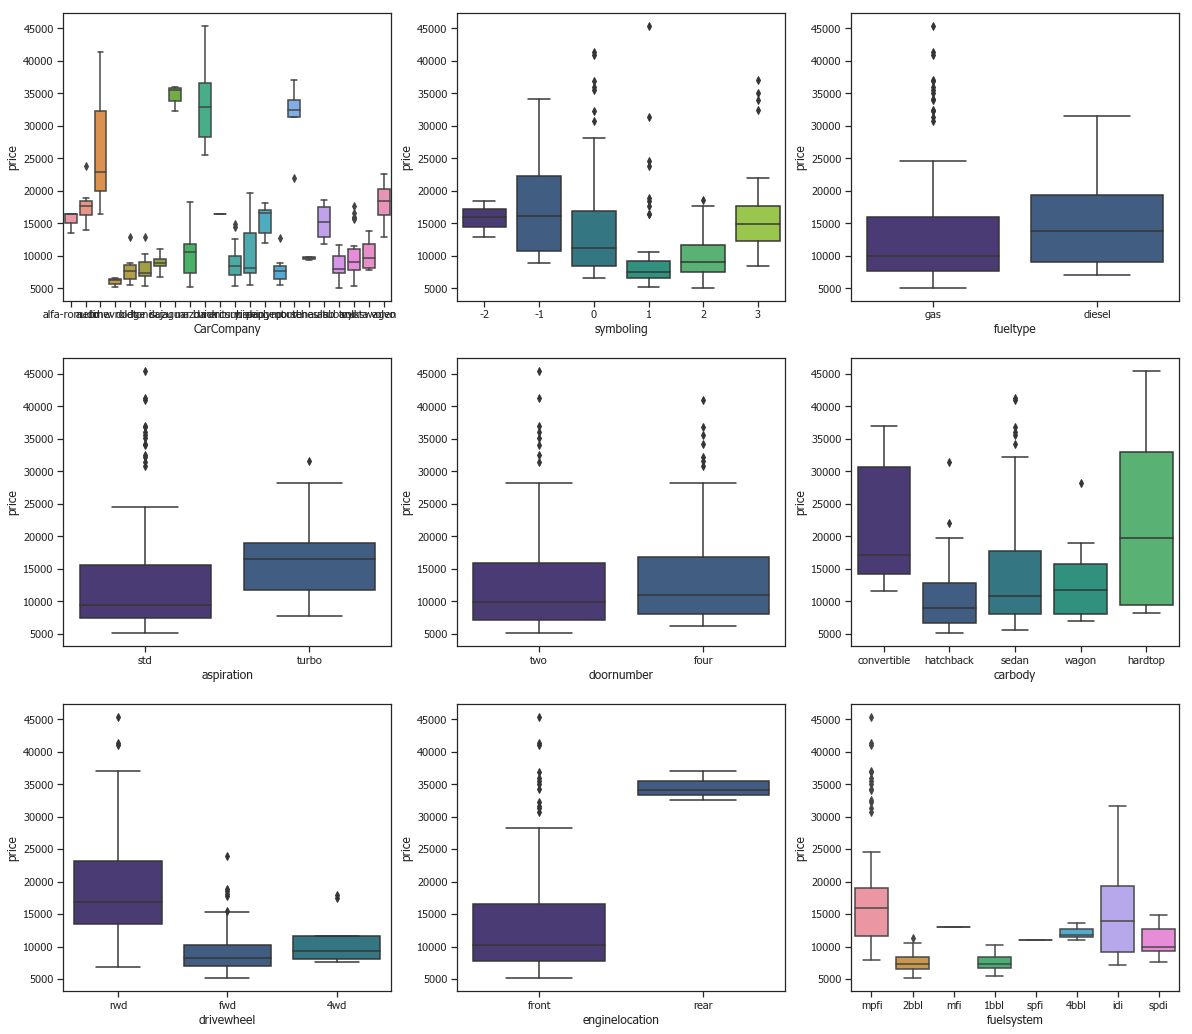

In [24]:
plt.figure(figsize=(20,18))

plt.subplot(3,3,1)
sns.boxplot(x="CarCompany", y="price", data=cars_df)
plt.subplot(3,3,2)
sns.boxplot(x="symboling", y="price",data=cars_df)
plt.subplot(3,3,3)
sns.boxplot(x="fueltype", y="price",data=cars_df)
plt.subplot(3,3,4)
sns.boxplot(x="aspiration", y="price",data=cars_df)
plt.subplot(3,3,5)
sns.boxplot(x="doornumber", y="price",data=cars_df)
plt.subplot(3,3,6)
sns.boxplot(x="carbody", y="price",data=cars_df)
plt.subplot(3,3,7)
sns.boxplot(x="drivewheel", y="price",data=cars_df)
plt.subplot(3,3,8)
sns.boxplot(x="enginelocation", y="price",data=cars_df)
plt.subplot(3,3,9)
sns.boxplot(x="fuelsystem", y="price",data=cars_df)

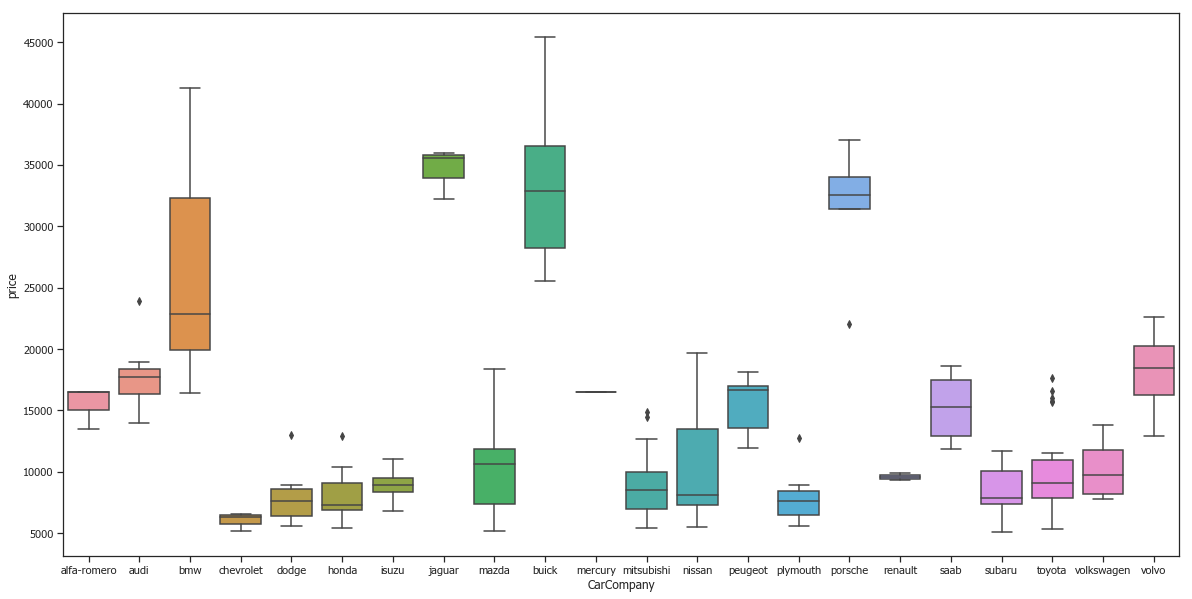

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(x="CarCompany", y="price", data=cars_df)

Based on the plots above we can draw following inferences:
 - There is significant difference in price for diesel cars compared to petrol diesel being costlier.
 - Similarly turbo charged engines have significant impact on price of car compared to standard engines.
 - Symboling doesn't have much significant impact on price of cars.
 - Hatchbacks are low price range cars and convertible and hardtops are among the costliest.
 - rear engine cars are considerably expensive compared to cars with engine in front.
 - No. of doors doesn't have sifnificant impact on price of cars.

### 2. Preparing Data for Modelling

We will create dummy variable for categorical independent variables. Let's create a function to create dummy variable and concat with the dataset.

In [26]:
status = pd.get_dummies(cars_df['CarCompany'])
cars_df = pd.concat([cars_df,status], axis=1)
cars_df.drop(['CarCompany'], axis=1,inplace=True)
cars_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0


In [27]:
status1 = pd.get_dummies(cars_df['fueltype'], drop_first = True)
cars_df = pd.concat([cars_df,status1], axis=1)
cars_df.rename(index=str, columns={"gas": "fueltype_gas"}, inplace=True)
cars_df.drop(['fueltype'], axis=1, inplace=True)

In [28]:
status2 = pd.get_dummies(cars_df['aspiration'], drop_first = True)
cars_df = pd.concat([cars_df,status2], axis=1)
cars_df.rename(index=str, columns={"turbo": "aspiration_turbo"}, inplace=True)
cars_df.drop(['aspiration'], axis=1, inplace=True)
cars_df.head()

,symboling,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,fueltype_gas,aspiration_turbo
0,3,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,1,0
1,3,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,1,0
2,1,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,1,0
3,2,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,1,0
4,2,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,1,0


In [29]:
status3 = pd.get_dummies(cars_df['symboling'])
cars_df = pd.concat([cars_df,status3], axis=1)
cars_df.drop(['symboling'], axis=1, inplace=True)
cars_df.rename(index=str, columns={-2: "symboling_-2",-1: "symboling_-1", 0: "symboling_0",1:"symboling_1",2:"symboling_2",3:"symboling_3"}, inplace=True)
cars_df.head()

,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,volkswagen,volvo,fueltype_gas,aspiration_turbo,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,130,...,0,0,1,0,0,0,0,0,0,1
1,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,130,...,0,0,1,0,0,0,0,0,0,1
2,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,152,...,0,0,1,0,0,0,0,1,0,0
3,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,109,...,0,0,1,0,0,0,0,0,1,0
4,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,136,...,0,0,1,0,0,0,0,0,1,0


In [30]:
status4 = pd.get_dummies(cars_df['doornumber'], drop_first = True)
cars_df = pd.concat([cars_df,status4], axis=1)
cars_df.drop(['doornumber'], axis=1, inplace=True)
cars_df.rename(index=str, columns={"two": "doornumber_two"}, inplace=True)
cars_df.head()

,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,...,volvo,fueltype_gas,aspiration_turbo,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,doornumber_two
0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,130,mpfi,...,0,1,0,0,0,0,0,0,1,1
1,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,130,mpfi,...,0,1,0,0,0,0,0,0,1,1
2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,152,mpfi,...,0,1,0,0,0,0,1,0,0,1
3,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,109,mpfi,...,0,1,0,0,0,0,0,1,0,0
4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,136,mpfi,...,0,1,0,0,0,0,0,1,0,0


In [31]:
status5 = pd.get_dummies(cars_df['carbody'])
cars_df = pd.concat([cars_df,status5], axis=1)
cars_df.drop(['carbody'], axis=1, inplace=True)
cars_df.head()

,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,...,symboling_0,symboling_1,symboling_2,symboling_3,doornumber_two,convertible,hardtop,hatchback,sedan,wagon
0,rwd,front,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,...,0,0,0,1,1,1,0,0,0,0
1,rwd,front,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,...,0,0,0,1,1,1,0,0,0,0
2,rwd,front,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,...,0,1,0,0,1,0,0,1,0,0
3,fwd,front,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,...,0,0,1,0,0,0,0,0,1,0
4,4wd,front,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,...,0,0,1,0,0,0,0,0,1,0


In [32]:
status6 = pd.get_dummies(cars_df['drivewheel'])
cars_df = pd.concat([cars_df,status6], axis=1)
cars_df.drop(['drivewheel'], axis=1, inplace=True)
cars_df.head()

,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,...,symboling_3,doornumber_two,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd
0,front,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,...,1,1,1,0,0,0,0,0,0,1
1,front,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,...,1,1,1,0,0,0,0,0,0,1
2,front,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,3.47,...,0,1,0,0,1,0,0,0,0,1
3,front,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,3.40,...,0,0,0,0,0,1,0,0,1,0
4,front,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,3.40,...,0,0,0,0,0,1,0,1,0,0


In [33]:
status7 = pd.get_dummies(cars_df['enginelocation'], drop_first = True)
cars_df = pd.concat([cars_df,status7], axis=1)
cars_df.drop(['enginelocation'], axis=1, inplace=True)
cars_df.rename(index=str, columns={"rear": "enginelocation_rear"}, inplace=True)
cars_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,...,doornumber_two,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,enginelocation_rear
0,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,...,1,1,0,0,0,0,0,0,1,0
1,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,...,1,1,0,0,0,0,0,0,1,0
2,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,3.47,9.0,...,1,0,0,1,0,0,0,0,1,0
3,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,3.40,10.0,...,0,0,0,0,1,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,3.40,8.0,...,0,0,0,0,1,0,1,0,0,0


In [34]:
status8 = pd.get_dummies(cars_df['fuelsystem'])
cars_df = pd.concat([cars_df,status8], axis=1)
cars_df.drop(['fuelsystem'], axis=1, inplace=True)
cars_df.rename(index=str, columns={"mpfi": "fuelsystem_mpfi","2bbl":"fuelsystem_2bbl","1bbl":"fuelsystem_1bbl","4bbl":"fuelsystem_4bbl","idi":"fuelsystem_idi","mfi":"fuelsystem_mfi","spdi":"fuelsystem_spdi", "spfi":"fuelsystem_spfi" }, inplace=True)
cars_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,rwd,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,1,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,1,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,1,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


In [35]:
cars_df.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,rwd,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,...,0.370732,0.014634,0.053659,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,...,0.484183,0.120377,0.225894,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
df_train, df_test = train_test_split(cars_df, train_size = 0.7, random_state=100, test_size=0.3)

In [37]:
df_train.shape

(143, 62)

In [38]:
df_test.shape

(62, 62)

In [39]:
scaler = MinMaxScaler()

In [40]:
num_vars = ['wheelbase','carlength', 'carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [41]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [42]:
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,rwd,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,...,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,...,1,0,0,0,0,0,0,1,0,0
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,...,1,0,0,0,0,0,0,1,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,...,1,0,0,0,0,0,0,1,0,0
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,...,1,0,0,0,0,0,0,1,0,0


In [43]:
df_train.describe() # to check the min and max value after MinMax Scaler implementation.

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,rwd,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,...,0.349650,0.006993,0.055944,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,...,0.478536,0.083624,0.230621,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 122 to 8
Data columns (total 62 columns):
wheelbase              143 non-null float64
carlength              143 non-null float64
carwidth               143 non-null float64
carheight              143 non-null float64
curbweight             143 non-null float64
enginesize             143 non-null float64
boreratio              143 non-null float64
stroke                 143 non-null float64
compressionratio       143 non-null float64
horsepower             143 non-null float64
peakrpm                143 non-null float64
citympg                143 non-null float64
highwaympg             143 non-null float64
price                  143 non-null float64
alfa-romero            143 non-null uint8
audi                   143 non-null uint8
bmw                    143 non-null uint8
buick                  143 non-null uint8
chevrolet              143 non-null uint8
dodge                  143 non-null uint8
honda                  143 non-n

In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 160 to 128
Data columns (total 62 columns):
wheelbase              62 non-null float64
carlength              62 non-null float64
carwidth               62 non-null float64
carheight              62 non-null float64
curbweight             62 non-null int64
enginesize             62 non-null int64
boreratio              62 non-null float64
stroke                 62 non-null float64
compressionratio       62 non-null float64
horsepower             62 non-null int64
peakrpm                62 non-null int64
citympg                62 non-null int64
highwaympg             62 non-null int64
price                  62 non-null float64
alfa-romero            62 non-null uint8
audi                   62 non-null uint8
bmw                    62 non-null uint8
buick                  62 non-null uint8
chevrolet              62 non-null uint8
dodge                  62 non-null uint8
honda                  62 non-null uint8
isuzu                 

## 3. Training the Model

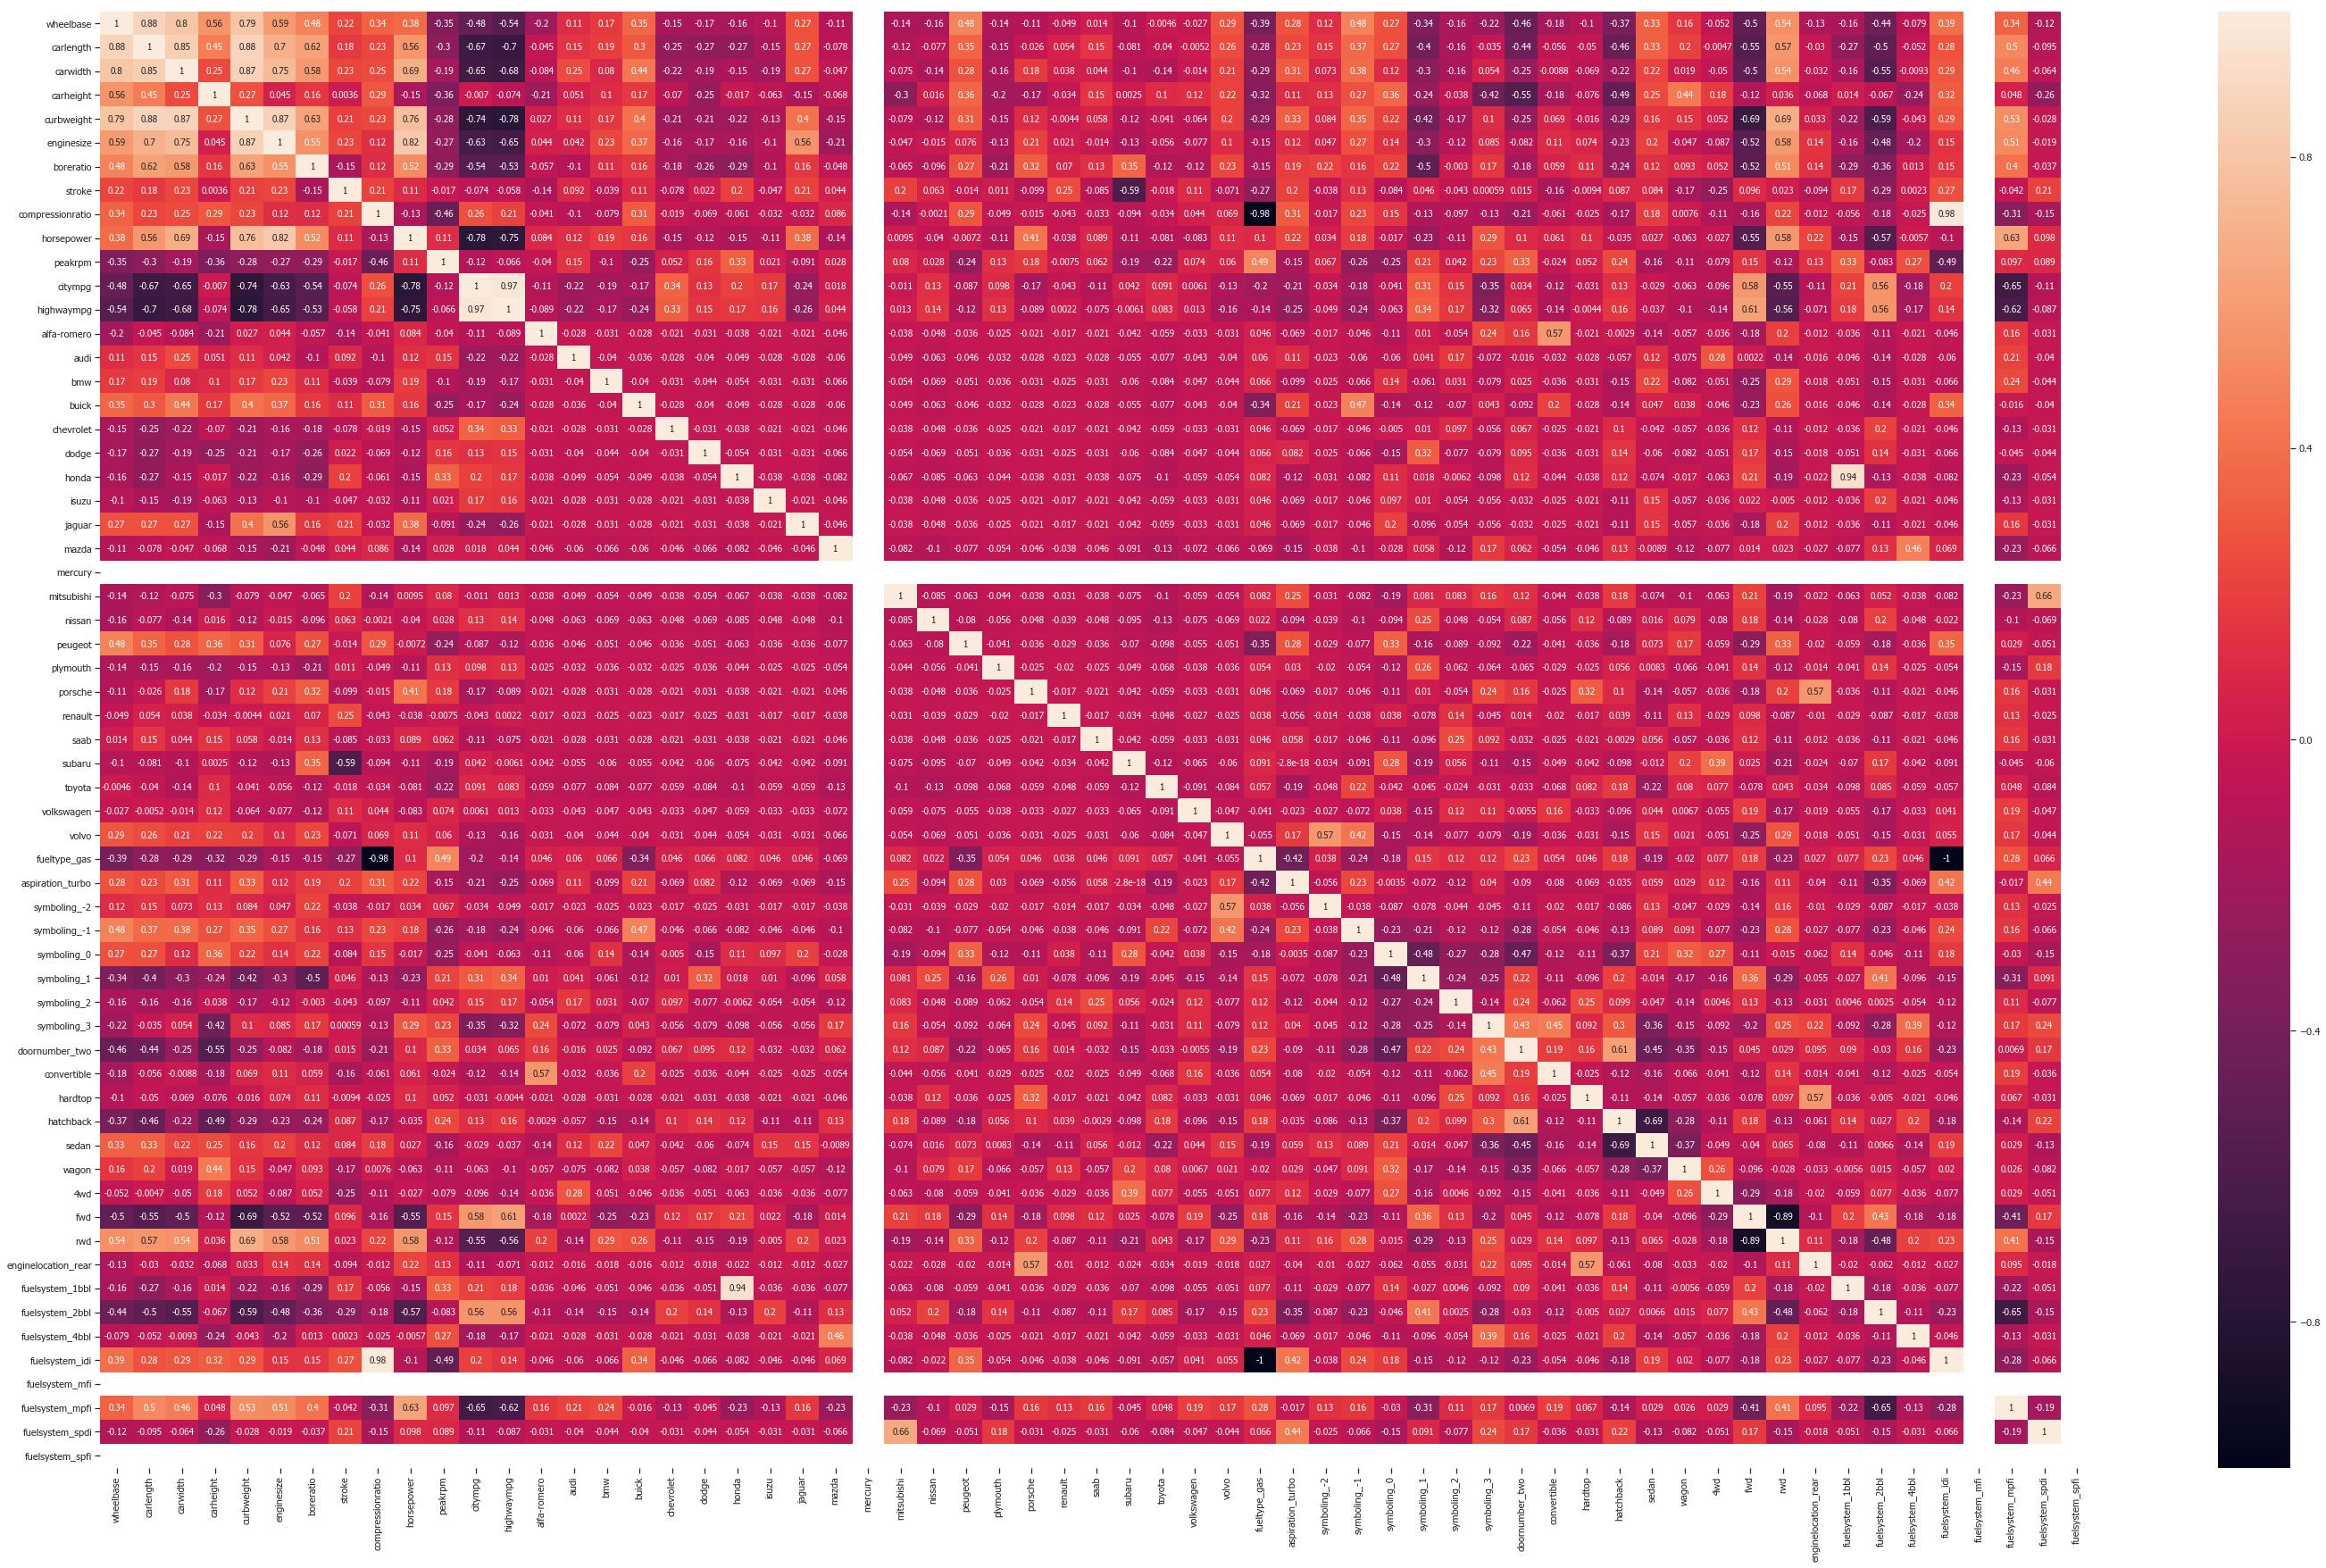

In [104]:
plt.figure(figsize=(50,30))
sns.heatmap(df_train.corr(),annot=True)

In [46]:
y_train = df_train.pop('price')
X_train = df_train

In [50]:
X_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,rwd,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,...,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,...,1,0,0,0,0,0,0,1,0,0
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,...,1,0,0,0,0,0,0,1,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,...,1,0,0,0,0,0,0,1,0,0
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,...,1,0,0,0,0,0,0,1,0,0


In [51]:
X_train.shape

(143, 61)

#### Adding all the variables to the Model - Model 1

In [52]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
# Fit the model
lr_model = lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     45.62
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.55e-47
Time:                        22:51:09   Log-Likelihood:                 253.55
No. Observations:                 143   AIC:                            -401.1
Df Residuals:                      90   BIC:                            -244.1
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0483    

## Building our Model using RFE - Model 2

In [54]:
# Importing relevant modules from sklearn library
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [55]:
lm = LinearRegression() # creating a linear regression object

In [56]:
lm.fit(X_train, y_train) # fitting the test data in the lm model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
rfe = RFE(lm,30) # selecting top 30 independent variable recursively.

In [58]:
rfe = rfe.fit(X_train,y_train) 

In [60]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 29),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', True, 1),
 ('alfa-romero', True, 1),
 ('audi', False, 26),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 7),
 ('dodge', True, 1),
 ('honda', True, 1),
 ('isuzu', False, 8),
 ('jaguar', True, 1),
 ('mazda', False, 21),
 ('mercury', False, 28),
 ('mitsubishi', True, 1),
 ('nissan', False, 6),
 ('peugeot', True, 1),
 ('plymouth', True, 1),
 ('porsche', True, 1),
 ('renault', True, 1),
 ('saab', True, 1),
 ('subaru', False, 10),
 ('toyota', False, 9),
 ('volkswagen', False, 11),
 ('volvo', True, 1),
 ('fueltype_gas', True, 1),
 ('aspiration_turbo', False, 5),
 ('symboling_-2', True, 1),
 ('symboling_-1', False, 22),
 ('symboling_0', False, 20),
 ('symboling_1'

In [61]:
# This shows top 30 independent variables(features) that best describes the linear regression model using recursive feature elemination method.
col = X_train.columns[rfe.support_] 
col

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'alfa-romero', 'bmw', 'buick', 'dodge',
       'honda', 'jaguar', 'mitsubishi', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'volvo', 'fueltype_gas', 'symboling_-2',
       'convertible', 'enginelocation_rear', 'fuelsystem_idi'],
      dtype='object')

In [62]:
X_train.columns[~rfe.support_] # showing eliminated features.

Index(['stroke', 'audi', 'chevrolet', 'isuzu', 'mazda', 'mercury', 'nissan',
       'subaru', 'toyota', 'volkswagen', 'aspiration_turbo', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'doornumber_two', 'hardtop', 'hatchback', 'sedan', 'wagon', '4wd',
       'fwd', 'rwd', 'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')

In [63]:
X_train_rfe = X_train[col]

In [64]:
X_train_rfe.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,compressionratio,horsepower,peakrpm,...,plymouth,porsche,renault,saab,volvo,fueltype_gas,symboling_-2,convertible,enginelocation_rear,fuelsystem_idi
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.15000,0.083333,0.551020,...,1,0,0,0,0,1,0,0,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.15625,0.395833,0.551020,...,0,1,0,0,0,1,0,0,0,0
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.15000,0.266667,1.000000,...,0,0,0,0,0,1,0,0,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.12500,0.262500,0.346939,...,0,0,0,0,0,1,0,1,0,0
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.03125,0.475000,0.387755,...,0,0,0,0,1,1,0,0,0,0


In [65]:
X_train_rfe_const = sm.add_constant(X_train_rfe)

In [66]:
lm = sm.OLS(y_train, X_train_rfe_const).fit()

In [67]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     91.20
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.24e-65
Time:                        22:53:15   Log-Likelihood:                 245.38
No. Observations:                 143   AIC:                            -430.8
Df Residuals:                     113   BIC:                            -341.9
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0502    

The r-square & adjusted r-square value calculated using RFE approach for 30 features is almost equal to the r-square value and adjusted r-square value calculated using all the features (Model - 1). This confirms that the additional features used in the model-1 were redundent and can be dropped. Also, Here the R-square/Adj-R Square value is very high (0.959/0.949) is very high confirming to an overfitted model. We must remove features that are highly correlated to each other to improve our model.

Now let's calculate the VIF values for 30 features selected using RFE model.

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_const.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_const.values, i) for i in range(X_train_rfe_const.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
30,fuelsystem_idi,inf
26,fueltype_gas,inf
8,compressionratio,67.54
11,citympg,34.59
12,highwaympg,32.89
5,curbweight,24.38
2,carlength,16.72
9,horsepower,14.57
6,enginesize,14.35
1,wheelbase,13.42


The top 11 features in the above list are greater than 5 and are highly correlated as per the VIF value and should be dropped. However we will drop variables based on following High p-value first.

In [70]:
feature_drop = ['wheelbase','carlength','enginesize','boreratio','horsepower','citympg','highwaympg','alfa-romero','peugeot']

In [71]:
X_train_new = X_train_rfe.drop(feature_drop,axis=1)

### Rebuliding Model - Model 3

In [73]:
# Rebuilding model by removing features with high p values. 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     112.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.15e-69
Time:                        22:55:00   Log-Likelihood:                 229.35
No. Observations:                 143   AIC:                            -416.7
Df Residuals:                     122   BIC:                            -354.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0304    

Now our model has improved slightly and new features with high p-values are coming into picture. Let's also calculated the VIF values of the above 19 features. 

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
21,fuelsystem_idi,inf
17,fueltype_gas,inf
4,compressionratio,53.05
3,curbweight,7.10
1,carwidth,5.62
2,carheight,2.07
5,peakrpm,1.92
13,porsche,1.91
10,jaguar,1.75
16,volvo,1.75


Again, following the same strategy, we will rebuild the model by droping features based on p value and VIF. We will now remove feature with high p value.

In [75]:
feature_drop = ['compressionratio','honda','plymouth','fuelsystem_idi']

### Rebuilding Model - Model 4

In [76]:
# Rebuilding model by removing features with high p values. 
X_train_new = X_train_new.drop(feature_drop,axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     127.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.44e-70
Time:                        22:55:20   Log-Likelihood:                 224.96
No. Observations:                 143   AIC:                            -413.9
Df Residuals:                     125   BIC:                            -360.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0877    

Again recalculating the VIF values of features selected in Model 4.

In [78]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,43.23
3,curbweight,6.22
1,carwidth,5.55
2,carheight,1.86
10,porsche,1.83
13,volvo,1.69
17,enginelocation_rear,1.65
4,peakrpm,1.62
8,jaguar,1.57
14,fueltype_gas,1.57


Repeating the steps for feature having p-value more than 0.05 and rebuilding the model.

### Rebuilding Model - Model 5

In [79]:
feature_drop = ['dodge','fueltype_gas']
X_train_new = X_train_new.drop(feature_drop,axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     143.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.35e-72
Time:                        22:55:45   Log-Likelihood:                 223.28
No. Observations:                 143   AIC:                            -414.6
Df Residuals:                     127   BIC:                            -367.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1134    

In [80]:
# Again calculating the VIF values for selected features in Model 5
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,27.86
3,curbweight,6.21
1,carwidth,5.51
9,porsche,1.82
2,carheight,1.75
12,volvo,1.68
15,enginelocation_rear,1.65
7,jaguar,1.54
6,buick,1.51
13,symboling_-2,1.49


##### Following similar steps to rebuild the model based on removing feature with high p value first.

### Rebuilding Model - Model 6

In [81]:
feature_drop = ['saab']
X_train_new = X_train_new.drop(feature_drop,axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     149.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.88e-72
Time:                        22:55:46   Log-Likelihood:                 221.14
No. Observations:                 143   AIC:                            -412.3
Df Residuals:                     128   BIC:                            -367.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1211    

In [82]:
# Again calculating the VIF values for selected features in Model 6
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,27.09
3,curbweight,6.18
1,carwidth,5.51
9,porsche,1.82
2,carheight,1.70
11,volvo,1.67
14,enginelocation_rear,1.65
7,jaguar,1.54
6,buick,1.50
12,symboling_-2,1.49


In this model we have controlled the p-value of all the features within 0.05 however there are features with VIF more than 5, showing higher correlation, hence we must drop them one by one.

### Rebuilding Model - Model 7

In [83]:
# Dropping feature with heighest VIF and creating new model
feature_drop = ['curbweight']
X_train_new = X_train_new.drop(feature_drop,axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     103.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.15e-61
Time:                        22:55:50   Log-Likelihood:                 191.37
No. Observations:                 143   AIC:                            -354.7
Df Residuals:                     129   BIC:                            -313.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1342    

In [84]:
# Again calculating the VIF values for selected features in Model 7
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,26.96
1,carwidth,1.86
8,porsche,1.81
10,volvo,1.66
2,carheight,1.65
13,enginelocation_rear,1.58
5,buick,1.49
11,symboling_-2,1.49
3,peakrpm,1.30
6,jaguar,1.27


Again we can observe that Adj R - Square value of 0.9 with Prob F- Statistics Value of 8.45e-62(Significantly low), confirming that the overall model fit is significant. However, again there are features with high p values which we will drop to simplify the model.

### Rebuilding Model - Model 8

In [85]:
# Dropping feature with high p value and creating new model
feature_drop = ['carheight','peakrpm','mitsubishi']
X_train_new = X_train_new.drop(feature_drop,axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     128.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.33e-63
Time:                        22:55:52   Log-Likelihood:                 186.74
No. Observations:                 143   AIC:                            -351.5
Df Residuals:                     132   BIC:                            -318.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1425    

In [86]:
# Again calculating the VIF values for selected features in Model 8
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,10.21
1,carwidth,1.74
5,porsche,1.68
7,volvo,1.63
10,enginelocation_rear,1.56
8,symboling_-2,1.49
3,buick,1.45
4,jaguar,1.16
9,convertible,1.05
2,bmw,1.03


Now VIF values are all within 5 and p values are also within 0.05 except for feature `renault`, lets drop it also.

### Rebuilding Model - Model 9 (Final Model)

In [87]:
# Dropping feature with high p value and creating new model
feature_drop = ['renault']
X_train_new = X_train_new.drop(feature_drop,axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     140.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.29e-63
Time:                        22:55:55   Log-Likelihood:                 184.94
No. Observations:                 143   AIC:                            -349.9
Df Residuals:                     133   BIC:                            -320.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1413    

In [88]:
# Again calculating the VIF values for selected features in Model 9
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,10.19
1,carwidth,1.73
5,porsche,1.67
6,volvo,1.63
9,enginelocation_rear,1.56
7,symboling_-2,1.49
3,buick,1.44
4,jaguar,1.16
8,convertible,1.05
2,bmw,1.03


##### The model created above is having R-Squared Value of 0.905 and adjusted R-Squared Value of 0.898 with all the features having p value below 0.05 and VIF value less than 5. Also Prob F-Statistics is significantly less than 0.05 showing that the overall model fit is significant.

### 4. Residual Analysis

In [89]:
# Now let's check the error terms are also normally distributed as per the assumptions of linear regression model. 
# The below mentioned histogram is almost showing a normal curve with mean value centered around zero and similar slight bulge arounf the tail. 

y_train_pred = lm.predict(X_train_lm) 

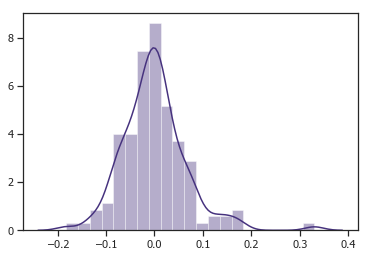

In [90]:
residual = y_train - y_train_pred
sns.distplot(residual)

### 5. Making Predictions

### Applying same scaling on the test set 

In [91]:

num_vars = ['wheelbase','carlength', 'carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [92]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [93]:
## Dividing into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [95]:
## Using our model to make predictions now.

X_test_new = X_test[X_train_new.columns] # Creating X_test_new dataframe by dropping features based on train dataset.
X_test_lm = sm.add_constant(X_test_new) # adding constant before using statsmodel api.

In [98]:
y_pred = lm.predict(X_test_lm)

### Model Evaluation

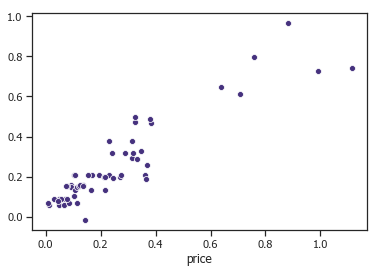

In [103]:
sns.scatterplot(y_test,y_pred)

In [102]:
# Evaluation
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred)

0.8453583609302668